<a href="https://colab.research.google.com/github/kiranraou/Python-Projects/blob/main/Deep%20Learning%20Assignmnet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Model for predicting the Gender of the uploaded image**

In this notebook, we will be covering some basics of what is a multi-output model in Keras and how we can take advantage of it when building our Deep Learning models. We will be using the UTK dataset, which contains pictures of people from diverse gender, races and ages.

**Datasets**

The UTKFace dataset is a large dataset composed of over 20 thousand face images with their respectivce annotations of age, gender and ethnicity. The images are properly cropped into the face region, but display some variations in pose, illumination, resolution, etc.

In order to retrieve the annotations of each record, we need to parse the filenames. Each record is stored in the following format: [age][gender][race]_[date&time].jpg

Where:

age is an integer from 0 to 116
gender is an integer in which 0 represents male and 1 represents female
race is an integer from 0 to 4, denoting white, black, asian, indian and others, respectively
date and time, denoting when the picture was taken

**Dataset link** = https://susanqq.github.io/UTKFace/

**Mounting Data from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -xvf '/content/drive/MyDrive/NIT Warangal _Industry Project/UTKFace.tar.gz'

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [3]:
import os
onlyfiles = os.listdir("/content/UTKFace")
onlyfiles

['25_0_0_20170114033002971.jpg.chip.jpg',
 '26_0_1_20170120140251905.jpg.chip.jpg',
 '45_0_0_20170117170513474.jpg.chip.jpg',
 '26_0_0_20170117173437732.jpg.chip.jpg',
 '22_0_1_20170102233341092.jpg.chip.jpg',
 '26_0_0_20170117171921227.jpg.chip.jpg',
 '65_0_3_20170105180657742.jpg.chip.jpg',
 '24_1_1_20170115235748123.jpg.chip.jpg',
 '37_0_0_20170117141403657.jpg.chip.jpg',
 '26_0_1_20170116205006069.jpg.chip.jpg',
 '31_1_1_20170117135046063.jpg.chip.jpg',
 '36_0_3_20170119181438574.jpg.chip.jpg',
 '23_0_0_20170117144620972.jpg.chip.jpg',
 '29_0_4_20170103235840396.jpg.chip.jpg',
 '39_1_2_20170116192459890.jpg.chip.jpg',
 '24_1_2_20170116165511429.jpg.chip.jpg',
 '24_1_3_20170117145441075.jpg.chip.jpg',
 '27_1_0_20170103182159657.jpg.chip.jpg',
 '66_1_0_20170110123225778.jpg.chip.jpg',
 '28_1_0_20170103182323771.jpg.chip.jpg',
 '20_0_0_20170104020603909.jpg.chip.jpg',
 '26_1_1_20170116162448538.jpg.chip.jpg',
 '15_0_1_20170113151409719.jpg.chip.jpg',
 '9_1_1_20170109201837354.jpg.chip

In [5]:
currentDirectory = os.getcwd()

In [43]:
dataset_name = os.path.join(currentDirectory, 'UTKFace/') 
onlyfiles = os.listdir(dataset_name)

**Importing libraries**

In [7]:
import numpy as np
import pandas as pd 
import math


import os
from os import listdir
from os.path import isfile, join

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import imageio
from scipy import misc
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.utils.np_utils import to_categorical

**Reading dataset**

In [8]:
fldr="/content/UTKFace"

files=os.listdir(fldr)

**Separating images and the age and gender labels into lists respectively**

In [9]:
ages=[]
genders=[]
images=[]

for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)
  total=fldr+'/'+fle

  #print(total)
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(128,128))
  images.append(image)

**Data preprocessing**

In [10]:

X_data =[]

for file in files:
    if int(file.split('_')[1])!= 3:
        face = imageio.imread(fldr+'/'+file)
        face = cv2.resize(face, (32,32))
        X_data.append(face)

In [11]:
# Remove single dimensional entries from the shape of an array

X = np.squeeze(X_data)
#X
X.shape

(23708, 32, 32, 3)

In [12]:
# Normalize data

X = X.astype('float32')
X /= 255

In [13]:
# Target labels

classes = [a for a in genders if a != 3]
np.unique(classes)

array([0, 1])

In [14]:
# Preparing the target set

categorical_labels = to_categorical(classes,num_classes=2)

**Preparing the train,validation and test dataset**

In [15]:
(x_train, y_train), (x_test, y_test) = (X[:8000],categorical_labels[:8000]) , (X[8000:] , categorical_labels[8000:])
(x_valid , y_valid) = (x_test[:890], y_test[:890])
(x_test, y_test) = (x_test[890:], y_test[890:])

In [16]:

len(x_train)+len(x_test) + len(x_valid) == len(X)

True

**Preparing the CNN model**



*Model Summary*

In [17]:
model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2

In [18]:
# Defining the early stop to monitor the validation loss to avoid overfitting.

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')



model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])


History = model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=40,
 #         callbacks=[callback],
          validation_data=(x_valid, y_valid))

Epoch 1/40
125/125 [==============================] - 32s 8ms/step - loss: 0.6634 - accuracy: 0.6087 - val_loss: 0.6629 - val_accuracy: 0.6191
Epoch 2/40
125/125 [==============================] - 1s 5ms/step - loss: 0.6260 - accuracy: 0.6600 - val_loss: 0.6069 - val_accuracy: 0.6697
Epoch 3/40
125/125 [==============================] - 1s 6ms/step - loss: 0.5904 - accuracy: 0.6960 - val_loss: 0.5716 - val_accuracy: 0.7247
Epoch 4/40
125/125 [==============================] - 1s 6ms/step - loss: 0.5661 - accuracy: 0.7145 - val_loss: 0.5322 - val_accuracy: 0.7303
Epoch 5/40
125/125 [==============================] - 1s 6ms/step - loss: 0.5415 - accuracy: 0.7325 - val_loss: 0.4998 - val_accuracy: 0.7674
Epoch 6/40
125/125 [==============================] - 1s 6ms/step - loss: 0.5172 - accuracy: 0.7513 - val_loss: 0.4652 - val_accuracy: 0.7978
Epoch 7/40
125/125 [==============================] - 1s 6ms/step - loss: 0.4937 - accuracy: 0.7631 - val_loss: 0.4495 - val_accuracy: 0.8135
Epoch

In [19]:
model.save('gender.h5')

**Evaluating the model accuracy**


  
**Train accuracy**

In [20]:
# Evaluate the model on train set
score = model.evaluate(x_train, y_train, verbose=7)

# Print accuracy
print('\n', 'Train accuracy:', score[1])


 Train accuracy: 0.8756250143051147


**Validation accuracy**

In [21]:
# Evaluate the model on validation set
score = model.evaluate(x_valid, y_valid, verbose=7)

# Print accuracy
print('\n', 'Validation accuracy:', score[1])


 Validation accuracy: 0.8617977499961853


**Test Accuracy**

In [22]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=7)

# Print accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8519368171691895


**Plotting the Loss and Accuracy curves**

In [23]:
train_loss1 = History.history['loss']
test_loss1 = History.history['val_loss']
train_accuracy1 = History.history['accuracy']
test_accuracy1 = History.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs (using grayscale images)')

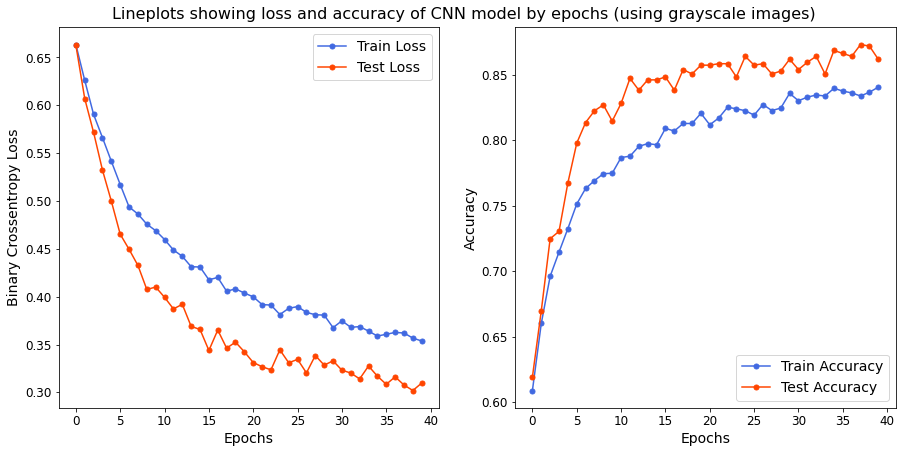

In [24]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss1, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss1, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Binary Crossentropy Loss', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy1, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy1, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs (using grayscale images)", fontsize=16)

**Testing on Test set of images**

In [25]:
labels =["Male",       # index 0
        "Female",      # index 1
        ]

print('Male ->', '0', '\nFemale ->', '1')

Male -> 0 
Female -> 1


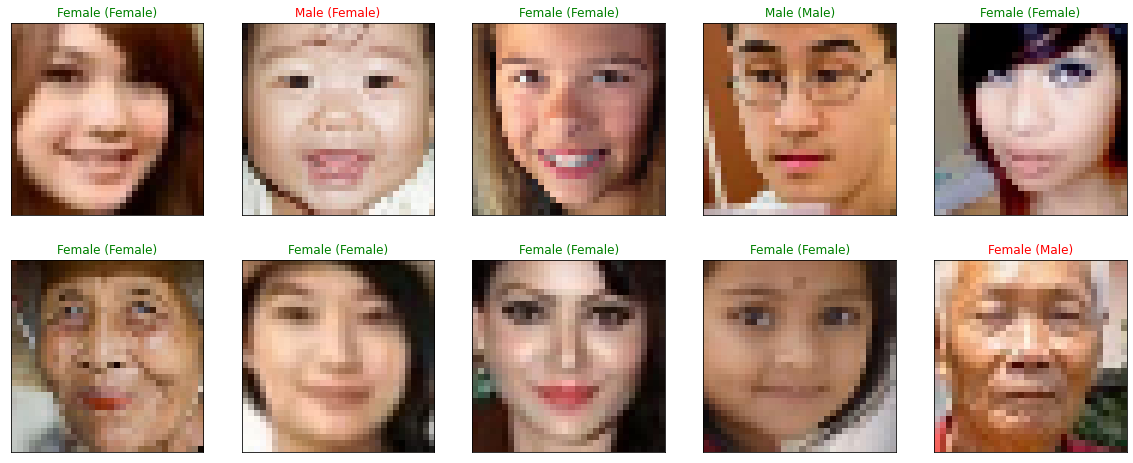

In [32]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    
    
plt.show()

***Testing on Test set of images working accurately as per model in above output.**

**Now Testing on external images.**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [34]:
# load and evaluate a saved model
import tensorflow as tf 
from numpy import loadtxt

 
# load model
model = tf.keras.models.load_model('gender.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2

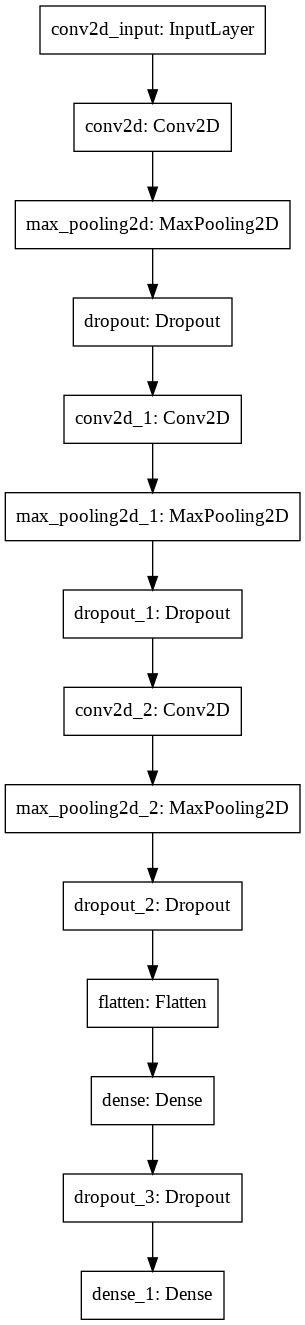

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='g_model.png')

In [36]:
from google.colab import files
files.upload()

Saving kr.jpg to kr.jpg


{'kr.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00\x1fCompressed by jpeg-recompress\xff\xdb\x00\x84\x00\x04\x04\x04\x04\x04\x04\x04\x04\x04\x04\x06\x06\x05\x06\x06\x08\x07\x07\x07\x07\x08\x0c\t\t\t\t\t\x0c\x13\x0c\x0e\x0c\x0c\x0e\x0c\x13\x11\x14\x10\x0f\x10\x14\x11\x1e\x17\x15\x15\x17\x1e"\x1d\x1b\x1d"*%%*424DD\\\x01\x04\x04\x04\x04\x04\x04\x04\x04\x04\x04\x06\x06\x05\x06\x06\x08\x07\x07\x07\x07\x08\x0c\t\t\t\t\t\x0c\x13\x0c\x0e\x0c\x0c\x0e\x0c\x13\x11\x14\x10\x0f\x10\x14\x11\x1e\x17\x15\x15\x17\x1e"\x1d\x1b\x1d"*%%*424DD\\\xff\xc2\x00\x11\x08\x00\xa0\x00\xa1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x04\x05\x07\x08\x02\x03\t\x01\x00\xff\xda\x00\x08\x01\x01\x00\x00\x00\x00\x9b"\x85o\xe5\x86\xfa\x9b\xf5\xb7\xe2\xe1\x1d\x90\xbe\xc7\x83J\x97\x1f\xd8\xeejT\x97s\xab5!\xe0\x8cG^q\xd8<\xff\x00\x84\x1b\x10(\xc6\xca\xf4\x9f\x9a5\x1d\xe2x\xb2K\xd6\xbax\xc3\x18\x0b\x99\x94

**Testing on external images.**

Predicted Sex: Female


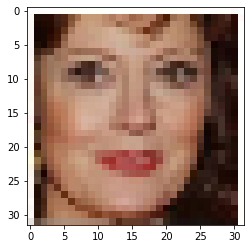

In [37]:
im1='/content/kr.jpg'
image=cv2.imread(im1)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image,(32,32))
image_f=np.array(image)
plt.imshow(image_f)
image_f_2=image_f/255
pred_1=model.predict(np.array([image_f_2]))
# pred_1
sex_f=['Male','Female']
sex=np.argmax(pred_1)
print("Predicted Sex: "+ sex_f[sex])

In [38]:
from google.colab import files
files.upload()

Saving rr.PNG to rr.PNG


{'rr.PNG': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x9d\x00\x00\x00\xa1\x08\x06\x00\x00\x00\xdd\x9e\xbd\x00\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x16%\x00\x00\x16%\x01IR$\xf0\x00\x00\xff\xa5IDATx^\xec\xfdgtd\xe9y\x9d\r\x93\xc3\t\x1d\x903\n\x95s\xce\x19U\x85\x02P\x85\x9cs\xce\x19\xe8nt\xa3s\x8e\xd3a\xf2\x0c\x87\x9ca\x8e")R\xcc\x12EQT\xa0\x12\x15H\x89J\xa4D*,[~-\xc9\xb6lK\xa2,[^k\x7f\xfb>\x05\xf44\x9b\xf2\xbb\xde\xef\x8f\x7f\xa9\xd7\xba\xd7)\xc4.\x9cs=\xfb\xde\xfb\x9c\xe7<\xe7m\xf8\xb7\x7f\xff\xf6\xef\xff\xf2\xbf\x7f\x83\xee\xdf\xfe\xfd_\xff\xf7o\xd0\xfd\xdb\xbf\xff\xeb\xff\xfe\r\xba\x7f\xfb\xf7\x7f\xfd\xdfC\xe8\x9e\xfd\xd6?\xe1\xfe\xb7\x7f\x88\x07\xbf\xfd\xdf\xf1\xe0\xd7\xfe\x16\xcf\xfe\xfc_\xe0\xcag\xbe\x8d\xe3\xaf}\x11S\xe7_G\xe7\xc2%$\xbaW\xe0J\x0cB\xefjA\x839\x8e\x1a]\x00\x95*\x17\xcaj\xad(\xa96\xa0\xa8R\x8d\xe2\xf2ZTT\xd7B\xa5n\x80\xc9\xac\x87\xd3e\x81\xc7gC\x80\x15\xf1\xd9\x11\xf7\xbb\x91\xf4\xfb

Predicted Sex: Male


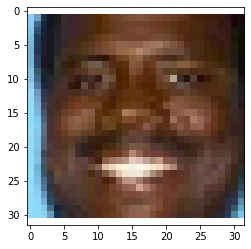

In [39]:
im1='/content/rr.PNG'
image=cv2.imread(im1)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image,(32,32))
image_f=np.array(image)
plt.imshow(image_f)
image_f_2=image_f/255
pred_1=model.predict(np.array([image_f_2]))
# pred_1
sex_f=['Male','Female']
sex=np.argmax(pred_1)
print("Predicted Sex: "+ sex_f[sex])

**Model working accurately-with having Test set of images and external images as well.**

**Using OpenCV and Haar Cascade File to check the gender in real time**

In [ ]:
##Using OpenCV and Haar Cascade File to check the gender in real time##


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = loaded_model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        gender = ('Female', 'Male')
        predicted_gender = gender[max_index]

        cv2.putText(test_img, predicted_gender, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Gender analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows